<a href="https://colab.research.google.com/github/paolofullone/DS_Paolo/blob/main/onda_roxa_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This project has the purpose of extract tweets related to 'Onda Roxa' in MG state, a lockdown due to Covid-19 impact.

* We will download some tweet data using TwitterSearch;
* Pre-process the data;
* Apply TextBlob with Nayve Bayes
* Plot a graph with the Nayve Bayes classification.

In [6]:
!pip install TwitterSearch

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup
import json
import re
%matplotlib inline

In [42]:
from nltk.corpus import stopwords
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

NameError: ignored

In [ ]:
# Código da documentação biblioteca TwitterSearch

"""

from TwitterSearch import *
try:
    tso = TwitterSearchOrder() # create a TwitterSearchOrder object
    tso.set_keywords(['Zema', 'Bolsonaro']) # let's define all words we would like to have a look for
    tso.set_language('pt') # we want to see Portuguese tweets only
    tso.set_include_entities(False) # and don't give us all those entity information

    # it's about time to create a TwitterSearch object with our secret tokens
    ts = TwitterSearch(
        consumer_key = "",
        consumer_secret = "",
        access_token = "-",
        access_token_secret = ""
     )

     # this is where the fun actually starts :)
    for tweet in ts.search_tweets_iterable(tso):
        print( '@%s tweeted: %s' % ( tweet['user']['screen_name'], tweet['text'] ) )

except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)

"""

In [50]:
from TwitterSearch import *
try:
    tso = TwitterSearchOrder() # create a TwitterSearchOrder object
    tso.set_keywords(['onda', 'roxa']) # let's define all words we would like to have a look for
    tso.set_language('pt') # we want to see portuguese tweets only
    tso.set_include_entities(False) # and don't give us all those entity information

    # it's about time to create a TwitterSearch object with our secret tokens
    ts = TwitterSearch(
        consumer_key = "",
        consumer_secret = "",
        access_token = "",
        access_token_secret = ""
     )

     # this is where the fun actually starts :)
    for tweet in ts.search_tweets_iterable(tso):
#        print( '@%s tweeted: %s' % ( tweet['user']['screen_name'], tweet['text'] ) )
         print('created_at: ', tweet['created_at'], 'User_id: ',tweet['id'], 'Tweet: ', tweet['text'])

         created_at = tweet['created_at']
         user_id = tweet['id']
         texto = tweet['text']

    with open("/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/tweets.json", "a+") as output:
 
           data = {"created_at": created_at,
                   "User_id": user_id,
                   "tweet": texto}

           #Print data
           output.write("{}\n".format(json.dumps(data)))
           
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)

created_at:  Mon Apr 12 00:54:57 +0000 2021 User_id:  1381410476937121793 Tweet:  Odio dessa onda roxa, queria fazer um rockzinho no meu niver
created_at:  Mon Apr 12 00:50:41 +0000 2021 User_id:  1381409403539234819 Tweet:  RT @LucasJunior___: @bbru_mendes Uai, a gente fica quieto porque perdia pra todo mundo! 😅 apesar que minas tá na onda roxa hoje a gente abr…
created_at:  Mon Apr 12 00:50:36 +0000 2021 User_id:  1381409381837836289 Tweet:  @bbru_mendes Uai, a gente fica quieto porque perdia pra todo mundo! 😅 apesar que minas tá na onda roxa hoje a gente… https://t.co/pS0VrwpkCo
created_at:  Mon Apr 12 00:48:11 +0000 2021 User_id:  1381408772460011526 Tweet:  E a onda roxa, ouviram falar de alguma coisa?
created_at:  Mon Apr 12 00:38:44 +0000 2021 User_id:  1381406395891847169 Tweet:  @RomeuZema venho encarecidamente pedir o senhor q dê um apoio ao nosso Prefeito de Capitólio MG as pessoas q querem… https://t.co/UvtdY6borh
created_at:  Mon Apr 12 00:27:23 +0000 2021 User_id:  138140

In [18]:
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/tweets_old.json', lines = True)
df.head(10)

,created_at,User_id,tweet
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas..."
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...
3,2021-04-09 22:26:48+00:00,1380648418373214213,RT @zsg_39: Romeu Zema está culpando o governo...
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...
5,2021-04-09 22:25:18+00:00,1380648039631745025,Presidente Bolsonaro - 97% dos governadores ge...
6,2021-04-09 22:24:35+00:00,1380647859733815302,Presidente Bolsonaro - 97% dos governadores ge...
7,2021-04-09 22:10:44+00:00,1380644373826826240,RT @canaldoconserv: Porque o Partido Novo não ...
8,2021-04-09 21:55:30+00:00,1380640541319299074,https://t.co/ghISy5IytK. STF precisa 1) Revert...
9,2021-04-09 21:32:23+00:00,1380634721651204096,"RT @MGsemcensura: E o vírus, enfim, está livre..."


In [19]:
df.shape # so we have for now 29.470 tweets

(29470, 3)

In [20]:
# Just in case...best practice, when you experiment a lot and don't want to read all data from twitter again...
df_backup = df
df_backup.head()

,created_at,User_id,tweet
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas..."
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...
3,2021-04-09 22:26:48+00:00,1380648418373214213,RT @zsg_39: Romeu Zema está culpando o governo...
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...


In [ ]:
#df = df_backup
#df.head()

# Drop all retweets

In [21]:
df.drop_duplicates(['tweet'], inplace=True) # Drop all retweets

In [22]:
df.shape
# de 29.470 reduziu para 3.449

(3449, 3)

# Applying NLTK (natural language toolkit) to interpret the tweets.

# Removing stopwords (meaningless words in the tweets).

In [23]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))        # a variável stopwords recebe a base de dados da nltk em português com o método set para pegar apenas palavras únicas
    palavras = [i for i in instancia.split() if not i in stopwords]   # a variável palavras é uma lista que itera item a item da instancia (que é a frase de ex. que vamos passar), e caso não seja uma palavra que está na lista de stopwords ela é adicionada na lista.
    return (" ".join(palavras))                                       # juntamos as palavras e separamos por espaço.

In [24]:
# Exemplo:
RemoveStopWords('Esse governador Romeu Zema é louco de ampliar essa onda Roxa')

'Esse governador Romeu Zema louco ampliar onda Roxa'

# Function to remove links, unwanted characters etc.

In [25]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','') #tudo que for http\ em diante será removido, tudo que for . vira vazio, tudo que for ; vira vazio...
    return (instancia) #após a limpeza retorna a frase.

    # re - regular expression

# Removing the unwanted characters and stopwords. Applyin the pre processing and adding a new column in dataframe.

In [26]:
def Preprocessing(instancia):
#    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
#    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in df.tweet]

In [27]:
df['preprocessed'] = tweets
df.head()

,created_at,User_id,tweet,preprocessed
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...,@em_com manda zema liberar tudo colocar tratam...
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas...","rt @aureacarolinax zema, passou meses passando..."
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...,rt @zsg_39 romeu zema culpando governo federal...
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...,rt @canaldoconserv porque partido novo opção? ...
5,2021-04-09 22:25:18+00:00,1380648039631745025,Presidente Bolsonaro - 97% dos governadores ge...,presidente bolsonaro 97% governadores geriram ...


# Stemming reduces the words to their stem (root) by removing suffixes.

In [28]:
def Stemming(instancia):                  # Reduzir as palavras ao radical.
    stemmer = nltk.stem.RSLPStemmer()     # objeto stemmer na variavel stemmer
    palavras = []                         # lista vazia de palavras.
    for w in instancia.split():           # para cada palavra na frase, lembrando que o instancia.split separa a frase em palavra por palavra, aplicamos o stemmer
        palavras.append(stemmer.stem(w))  # agora incluimos essa palavra na lista
    return (" ".join(palavras))           # juntamos todas as palavras em uma lista.

# Aplica a função em todos os dados:
tweets = [Stemming(i) for i in df.preprocessed]

# Inclui nova coluna no DF
df['preprocessed_stemming'] = tweets
df.head()

,created_at,User_id,tweet,preprocessed,preprocessed_stemming
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...,@em_com manda zema liberar tudo colocar tratam...,@em_com mand zem liber tud coloc trat precoc b...
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas...","rt @aureacarolinax zema, passou meses passando...","rt @aureacarolinax zema, pass mes pass pan p/ ..."
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...,rt @zsg_39 romeu zema culpando governo federal...,rt @zsg_39 rom zem culp govern feder falt kit ...
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...,rt @canaldoconserv porque partido novo opção? ...,rt @canaldoconserv porqu part nov opção? possu...
5,2021-04-09 22:25:18+00:00,1380648039631745025,Presidente Bolsonaro - 97% dos governadores ge...,presidente bolsonaro 97% governadores geriram ...,presid bolsonar 97% govern ger mal pessim dinh...


# Now we will apply beautifull soup to remove some extra characters.

In [29]:
def prep_tweets(tweet):

  tweet = BeautifulSoup(tweet, 'html.parser').get_text() # Remove tags html
  tweet = re.sub(r"[^a-zA-Zà-úÀ-Ú0-9]"," ", tweet.lower()) # Limpa caracteres indesejados e passa todas os caracteres para minúsculo
  return tweet

In [30]:
df['cleaned_tweets'] = [prep_tweets(tweet) for tweet in df.preprocessed_stemming]
df.head()

# Agora temos o cleaned tweets após aplicar 2 pre-processamentos.

,created_at,User_id,tweet,preprocessed,preprocessed_stemming,cleaned_tweets
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...,@em_com manda zema liberar tudo colocar tratam...,@em_com mand zem liber tud coloc trat precoc b...,em com mand zem liber tud coloc trat precoc b...
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas...","rt @aureacarolinax zema, passou meses passando...","rt @aureacarolinax zema, pass mes pass pan p/ ...",rt aureacarolinax zema pass mes pass pan p ...
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...,rt @zsg_39 romeu zema culpando governo federal...,rt @zsg_39 rom zem culp govern feder falt kit ...,rt zsg 39 rom zem culp govern feder falt kit ...
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...,rt @canaldoconserv porque partido novo opção? ...,rt @canaldoconserv porqu part nov opção? possu...,rt canaldoconserv porqu part nov opção possu...
5,2021-04-09 22:25:18+00:00,1380648039631745025,Presidente Bolsonaro - 97% dos governadores ge...,presidente bolsonaro 97% governadores geriram ...,presid bolsonar 97% govern ger mal pessim dinh...,presid bolsonar 97 govern ger mal pessim dinh...


# Now we will apply TextBlob to classify the dataframe, this is a step that can take a lot of time, so we will extract ~10% of the total dataframe to test.

In [31]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [32]:
df_test = df.sample(350)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 2954 to 26297
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   created_at             350 non-null    datetime64[ns, UTC]
 1   User_id                350 non-null    int64              
 2   tweet                  350 non-null    object             
 3   preprocessed           350 non-null    object             
 4   preprocessed_stemming  350 non-null    object             
 5   cleaned_tweets         350 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 19.1+ KB


In [33]:
def sentiment_calc(text):
    try:
        return TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
    except:
        return None

df_test['sentiment'] = df_test['cleaned_tweets'].apply(sentiment_calc)

In [51]:
df_test.head()

,created_at,User_id,tweet,preprocessed,preprocessed_stemming,cleaned_tweets,sentiment,class
2954,2021-04-03 12:51:56+00:00,1378329418884653058,RT @VFGOGomes: Zema se juntou ao genocida Bols...,"rt @vfgogomes zema juntou genocida bolsonaro, ...","rt @vfgogom zem junt genoc bolsonaro, torn gen...",rt vfgogom zem junt genoc bolsonaro torn gen...,"(pos, 0.777124183006536, 0.2228758169934638)",pos
5788,2021-04-08 23:43:18+00:00,1380305280815095808,"EU NÃO AGUENTOOO, enquanto tem milhares de mor...","aguentooo, enquanto milhares mortes covid infl...","aguentooo, enquant milh mort covid influenc in...",aguentooo enquant milh mort covid influenc in...,"(pos, 0.75, 0.2499999999999997)",pos
305,2021-04-08 22:24:53+00:00,1380285545872510988,Minha mãe quase morre quando lembra que votou ...,mãe quase morre lembra votou anastasia pro zem...,mãe quas morr lembr vot anastas pro zem ir pro...,mãe quas morr lembr vot anastas pro zem ir pro...,"(neg, 0.3670212765957453, 0.6329787234042549)",neg
6282,2021-04-08 13:40:06+00:00,1380153479218487307,@MinJulioCesar @doisdedosdeteo O culto presenc...,@minjuliocesar @doisdedosdeteo culto presencia...,@minjulioces @doisdedosdete cult presenc dev s...,minjulioces doisdedosdete cult presenc dev s...,"(pos, 0.572463768115942, 0.42753623188405776)",pos
6972,2021-04-07 01:33:15+00:00,1379608175742218241,amanhã tenho reunião com a empresa 9 da manhã....,amanhã reunião empresa 9 manhã tô ansiosa?? qu...,amanhã reun empr 9 manhã tô ansiosa?? quer ir ...,amanhã reun empr 9 manhã tô ansiosa quer ir ...,"(neg, 0.0625, 0.9375000000000007)",neg


# For now let's take only the 'positive' or 'negative', let's also simplify ignoring the 'neutral' for now.

In [36]:
classification = lambda text: TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment.classification
df_test['class'] = df_test['cleaned_tweets'].apply(classification)

In [37]:
df_test.head()

,created_at,User_id,tweet,preprocessed,preprocessed_stemming,cleaned_tweets,sentiment,class
2954,2021-04-03 12:51:56+00:00,1378329418884653058,RT @VFGOGomes: Zema se juntou ao genocida Bols...,"rt @vfgogomes zema juntou genocida bolsonaro, ...","rt @vfgogom zem junt genoc bolsonaro, torn gen...",rt vfgogom zem junt genoc bolsonaro torn gen...,"(pos, 0.777124183006536, 0.2228758169934638)",pos
5788,2021-04-08 23:43:18+00:00,1380305280815095808,"EU NÃO AGUENTOOO, enquanto tem milhares de mor...","aguentooo, enquanto milhares mortes covid infl...","aguentooo, enquant milh mort covid influenc in...",aguentooo enquant milh mort covid influenc in...,"(pos, 0.75, 0.2499999999999997)",pos
305,2021-04-08 22:24:53+00:00,1380285545872510988,Minha mãe quase morre quando lembra que votou ...,mãe quase morre lembra votou anastasia pro zem...,mãe quas morr lembr vot anastas pro zem ir pro...,mãe quas morr lembr vot anastas pro zem ir pro...,"(neg, 0.3670212765957453, 0.6329787234042549)",neg
6282,2021-04-08 13:40:06+00:00,1380153479218487307,@MinJulioCesar @doisdedosdeteo O culto presenc...,@minjuliocesar @doisdedosdeteo culto presencia...,@minjulioces @doisdedosdete cult presenc dev s...,minjulioces doisdedosdete cult presenc dev s...,"(pos, 0.572463768115942, 0.42753623188405776)",pos
6972,2021-04-07 01:33:15+00:00,1379608175742218241,amanhã tenho reunião com a empresa 9 da manhã....,amanhã reunião empresa 9 manhã tô ansiosa?? qu...,amanhã reun empr 9 manhã tô ansiosa?? quer ir ...,amanhã reun empr 9 manhã tô ansiosa quer ir ...,"(neg, 0.0625, 0.9375000000000007)",neg


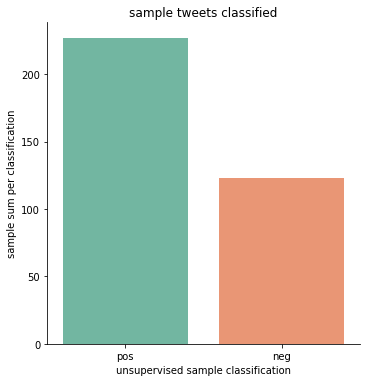

In [49]:
sns.catplot(x='class', kind='count', palette='Set2', data=df_test);
plt.title('sample tweets classified')
plt.xlabel('unsupervised sample classification')
plt.ylabel('sample sum per classification')
plt.savefig('/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/sample_tweets.png')

# Applying TextBlob in the hole dataframe.

* This is the code to include polarity and subjectivity in dataframe, to simplify I will apply only the classification.

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
    except:
        return None

df['sentiment'] = df['cleaned_tweets'].apply(sentiment_calc)


# Including the classification in the Dataframe.

In [ ]:
df.head()

,created_at,User_id,tweet,preprocessed,preprocessed_stemming,cleaned_tweets,sentiment
0,2021-04-09 23:05:22+00:00,1380658124596641797,@em_com Manda Zema liberar tudo e colocar trat...,@em_com manda zema liberar tudo colocar tratam...,@em_com mand zem liber tud coloc trat precoc b...,em com mand zem liber tud coloc trat precoc b...,"(pos, 0.9193548387096774, 0.08064516129032247)"
1,2021-04-09 22:52:12+00:00,1380654808080744448,"RT @aureacarolinax: Zema, que passou meses pas...","rt @aureacarolinax zema, passou meses passando...","rt @aureacarolinax zema, pass mes pass pan p/ ...",rt aureacarolinax zema pass mes pass pan p ...,"(neg, 0.3205804749340371, 0.6794195250659617)"
2,2021-04-09 22:32:11+00:00,1380649773611548673,RT @zsg_39: Romeu Zema está culpando o governo...,rt @zsg_39 romeu zema culpando governo federal...,rt @zsg_39 rom zem culp govern feder falt kit ...,rt zsg 39 rom zem culp govern feder falt kit ...,"(neg, 0.47872340425531823, 0.5212765957446799)"
4,2021-04-09 22:25:51+00:00,1380648177032962052,RT @canaldoconserv: Porque o Partido Novo não ...,rt @canaldoconserv porque partido novo opção? ...,rt @canaldoconserv porqu part nov opção? possu...,rt canaldoconserv porqu part nov opção possu...,"(pos, 0.9015489862469881, 0.09845101375301293)"
5,2021-04-09 22:25:18+00:00,1380648039631745025,Presidente Bolsonaro - 97% dos governadores ge...,presidente bolsonaro 97% governadores geriram ...,presid bolsonar 97% govern ger mal pessim dinh...,presid bolsonar 97 govern ger mal pessim dinh...,"(pos, 0.5, 0.5)"


In [ ]:
classification = lambda text: TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment.classification
df['algo_class'] = df['cleaned_tweets'].apply(classification)

In [ ]:
sns.catplot(x='class', kind='count', palette='Set2', data=df_test);
plt.title('comlete DF tweets classified')
plt.xlabel('unsupervised  classification')
plt.ylabel('sum per classification')
plt.savefig('/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/tweets-.png')

In [ ]:
# Now we have some opportunities to further develop this project:

# 1 - Manually label the data to train and test the algo, get some metric evaluation;
# 2 - Apply other classification algorithms.
# 3 - Tune the algorithms with GridSearch;
# 4 - Re-evaluate the results.

# I expected more 'negative' comments than 'positive' comments, so this steps are necessary to validate.

In [ ]:
# Storing the df in a csv file.

In [ ]:
df_test.to_csv('/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/df_test_sentiment_analysis.csv')
df.to_csv('/content/drive/MyDrive/CienciaDados/Mod8-MineracaoTextos/Projeto_Zema/df_sentiment_analysis.csv')